#### Part 1: Scraping and Saving HTML Content

###### 1.Identify the Target:
#Start with navigating to the “free” section on the Craigslist San Francisco Bay Area site (https://sfbay.craigslist.org/search/zip).
#This page lists items that people are giving away for free.

In [52]:
from bs4 import BeautifulSoup
import requests
import time
headers = {'User-Agent': 'Mozilla/5.0'}
url = 'https://sfbay.craigslist.org/search/zip'

In [53]:
page = requests.get(url, headers)

In [54]:
soup = BeautifulSoup(page.content,'html.parser')

In [55]:
print(soup.prettify())
time.sleep(5)

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <meta content="craigslist" property="og:site_name"/>
  <meta content="preview" name="twitter:card"/>
  <meta content="SF bay area free stuff - craigslist" property="og:title"/>
  <meta content="SF bay area free stuff - craigslist" name="description"/>
  <meta content="SF bay area free stuff - craigslist" property="og:description"/>
  <meta content="https://sfbay.craigslist.org/search/zip" property="og:url"/>
  <title>
   SF bay area free stuff - craigslist
  </title>
  <link href="https://sfbay.craigslist.org/search/zip" rel="canonical"/>
  <link href="https://sfbay.craigslist.org/search/zip" hreflang="x-default" rel="alternate"/>
  <link href="/favicon.ico" id="favicon" rel="icon">
   <script id="ld_searchpage_data" type="application/ld+json">
    {"description":"Free Stuff in SF Bay Area","@type":"Se

##### 2. Interact with the Page-Sorting:

###### Initially, the listings might be sorted by “newest” first.  
#Try changing the sorting order to “oldest” first by interacting with the page’s UI.

###### Observe any changes in the URL after you change the sorting order back and forth.

###### Can you trigger the sorting change directly by modifying only the URL in your browser’s address bar?  If so, how?

###### Explain what type of request is made when you change the sort order (GET or POST).

###### Request URL:
https://sfbay.craigslist.org/search/zip?sort=dateoldest
Request Method:
GET


 I haven't changed anything on the server to retrieve data from the list of 'free' items , this always a GET request.
 GET request here,  would do the  modifiying by intereacting with the page's URL.

###### What is the variable in the URL associated with sorting?

###### The variable associated with sorting is "sort"
date: sort by the newest
dateoldest: sort by the oldest 


###### 3a. Interact with the Page-Pagination

3a.Determine how to move between pages by only changing the URL. What part of the URL changes as you navigate through different pages?

url 1st : https://sfbay.craigslist.org/search/zip#search=1~gallery~0~0
url_next : https://sfbay.craigslist.org/search/zip#search=1~gallery~1~0
So I noticed that on craiglists website it is shown a slight change in the last part on the URL 
#search=1~gallery~0~0` to `#search=1~gallery~1~0` 
It will navigate us to the next page, and i did notice it is following indexing starts from 0.



###### 3b.Identify the variable associated with page changes. How does altering this variable in the URL affect the page you’re viewing?**<p>
    
I identified that the variable associated with page changes is the pagination element within the page's HTML (through inspecting) is through the class "cl-page-number"
here in the website it shows the first 120 listings out of the total listings(4,089)
structure in website  :1 - 120 of 4,089 to 121 - 240 of 4,089
    
We can slightly change this variable by navigating between pages and  also modifies the portion of listings displayed. 

###### 4a. Use `requests` to access the first page of the “free” section, ordered “newest” first.

In [56]:
url = 'https://sfbay.craigslist.org/search/zip'
response = requests.get(url)
print(response)

<Response [200]>


###### 4b. Deploy `BeautifulSoup` to parse the HTML content.

In [57]:
soup = BeautifulSoup(response.text, 'html.parser')


###### Identify the structure that holds the links to individual listing pages.  What selector do you choose to grab the link?

In [58]:
next_links = soup.find('a', class_='bd-button cl-next-page icon-only')
next_page_url = None 
if next_links:
    next_page_url = next_links['href']  
    response = requests.get(next_page_url)
if next_page_url:
    print(next_page_url)
else:
    print("No next page link found.")  
    
time.sleep(5)    

No next page link found.


###### Extract the first 250 unique listing URLs and save them to a list.  Consider the pagination feature of Craigslist to navigate through pages.  Explain your strategy.

Print the list to screen.

In [59]:
# Method 1

"""

Here, I'm extracting and prints up to 250 unique links from selecting by the class name 'title'. 
It iterates through each element, retrieves the 'href' attribute from the parent of the element, and adds the link to a list of unique links if it's not already included. The loop terminates once 250 unique links are collected or all elements are processed. Finally, 
it prints each unique link and the total number of unique links counts stops after retriveing after 250 links
which we see in the count variable.

"""

links = soup.select('div.title')
unique_links = []  
count = 0

for i in links:
    if count < 250:  
        href = i.parent.get('href')
        if href and href not in unique_links:
            unique_links.append(href)  
            count += 1
    else:
        break


for link in unique_links:
    print(link)

print(len(unique_links))  
print(count) 

time.sleep(5)

https://sfbay.craigslist.org/sby/zip/d/san-jose-velum-patio-awnings/7715733520.html
https://sfbay.craigslist.org/nby/zip/d/greenbrae-teeter-dex-inversion-core/7715733416.html
https://sfbay.craigslist.org/sby/zip/d/san-jose-plastic-step-stool/7715732748.html
https://sfbay.craigslist.org/sby/zip/d/san-jose-various-remote-controls/7715732168.html
https://sfbay.craigslist.org/nby/zip/d/larkspur-ikea-bjursta-wall-mounted-drop/7715731660.html
https://sfbay.craigslist.org/eby/zip/d/hayward-free-t5-blue-bulbs-brand-new/7715731896.html
https://sfbay.craigslist.org/nby/zip/d/penngrove-wood-table-and-benches/7715731844.html
https://sfbay.craigslist.org/nby/zip/d/mill-valley-marvin-windows/7715731800.html
https://sfbay.craigslist.org/sby/zip/d/san-jose-wood-bed-frame/7715731562.html
https://sfbay.craigslist.org/sfc/zip/d/san-francisco-free-shelf/7715731453.html
https://sfbay.craigslist.org/eby/zip/d/concord-pressure-treated-odds-and-ends/7715731451.html
https://sfbay.craigslist.org/sfc/zip/d/san-f

In [60]:
#Method 2[Stackoverflow]

url_method2 = soup.select('li.cl-static-search-result a')
for i in url_method2:
     print(i.get('href'))
        
print(unique_links)

#here, all items inside the class "cl-static-search-result" 
# when i was running , it is capturing all the listings with the 'a'
# It is beacuse the start to every tabindex of the 'li' items. have 'a' in it 
#Basically it is similar to the mrthod 1.        

https://sfbay.craigslist.org/sby/zip/d/san-jose-velum-patio-awnings/7715733520.html
https://sfbay.craigslist.org/nby/zip/d/greenbrae-teeter-dex-inversion-core/7715733416.html
https://sfbay.craigslist.org/sby/zip/d/san-jose-plastic-step-stool/7715732748.html
https://sfbay.craigslist.org/sby/zip/d/san-jose-various-remote-controls/7715732168.html
https://sfbay.craigslist.org/nby/zip/d/larkspur-ikea-bjursta-wall-mounted-drop/7715731660.html
https://sfbay.craigslist.org/eby/zip/d/hayward-free-t5-blue-bulbs-brand-new/7715731896.html
https://sfbay.craigslist.org/nby/zip/d/penngrove-wood-table-and-benches/7715731844.html
https://sfbay.craigslist.org/nby/zip/d/mill-valley-marvin-windows/7715731800.html
https://sfbay.craigslist.org/sby/zip/d/san-jose-wood-bed-frame/7715731562.html
https://sfbay.craigslist.org/sfc/zip/d/san-francisco-free-shelf/7715731453.html
https://sfbay.craigslist.org/eby/zip/d/concord-pressure-treated-odds-and-ends/7715731451.html
https://sfbay.craigslist.org/sfc/zip/d/san-f

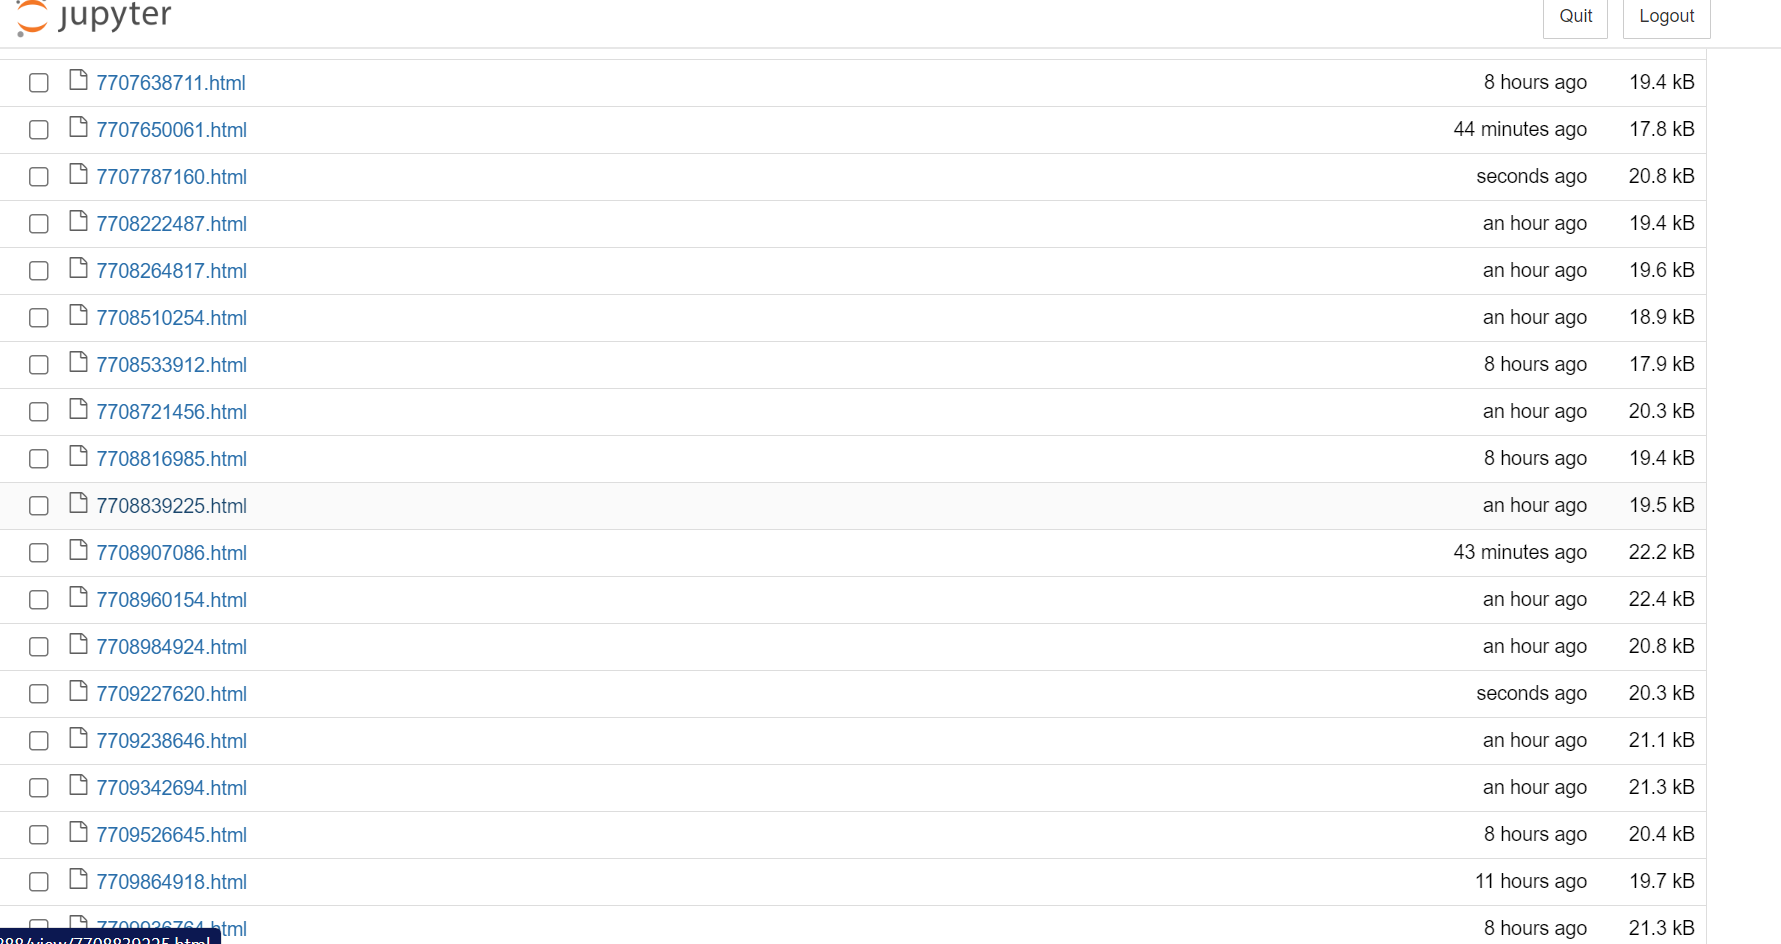


Here the image is saved As e.g., save listing ID 7713901653 to file “7713901653.html”

In [61]:
#Writing HTML FILES

In [ ]:
 direct = "New folder"


for url in unique_links:
    listing_id = url.split('/')[-1].replace('.html', '')
    response = requests.get(url)
    file_path = os.path.join(direct, f"{listing_id}.html")
    time.sleep(5)
    with open(f"{listing_id}.html", "w", encoding='utf-8') as file:
        file.write(response.text)
    file_path = "New File.html"    
    print(f"Saved {file_path}")   
    
    
    
    
    
   

Saved New File.html
Saved New File.html
Saved New File.html
Saved New File.html
Saved New File.html


###### Part 2: Parsing and Displaying Information from Saved HTML

 

(1)  Read Saved HTML Files:
Write a script that reads each of the saved HTML files from the disk.

(2) Extract Information:
For each HTML file, use `BeautifulSoup` to parse the file content.

Extract and print the following details:

Title: The title of the listing.

URL of first image (if an image exists):  The URL of the displayed image.  It can be found in the `src` attribute of `<img>`

Description: The full description text of the listing.

Post ID: Usually found at the bottom of the page or within the page's HTML structure.

Posted Date: The date when the listing was originally posted.

Last Updated Date: The date when the listing was last updated

In [ ]:
import os


directory = "links_unique_saved"

for filename in os.listdir(directory):
    
    if filename.endswith(".html"):
        
        filepath = os.path.join(directory, filename)
        #Read Saved HTML Files
      
        with open(filepath, 'r', encoding='utf-8') as file:
            
            html = file.read()
            soup = BeautifulSoup(html, 'html.parser')
           #Extract Details
            img_tag = soup.find('img')  
            title = soup.find('title').text if soup.find('title') else 'No title found'
            image_url = soup.find('img')['src'] if img_tag else None 
            description = soup.find('section', {'id': 'postingbody'}).text.strip() 
            post_id = soup.find('p', {'class': 'postinginfo'}).text 
            posted_date = soup.find('time', {'class': 'date'}).text 
            last_updated_date = soup.find('time', {'class': 'date timeago'}).text
            

            print(f"Title of {filename}: {title}")
            print(f"Image URL: {image_url}")
            print(f"Description: {description}")
            print(f"Post ID: {post_id}")
            print(f"Posted Date: {posted_date}")
            print(f"Last Updated Date: {last_updated_date}\n")


###### PART 3
         

######  1 Creating and Verifying a The Old Reader Account
Account Creation:  Create an account on https://theoldreader.comLinks to an external site..  Use an email address and password that you are comfortable sharing with us.

Manual Login Verification: Before automating the login process, ensure you can manually log in to theoldreader.com with your new credentials.  This confirms that your account is active and your credentials are correct.

#####  2 Exploring the Login Mechanism
Navigate to the login page of https://theoldreader.comLinks to an external site..

Use your browser’s developer tools to inspect the page, focusing on the <form> tag involved in the login process.

Document all `<input>` fields within the login form, paying special attention to their name attributes. These fields are crucial for submitting the login request programmatically.


###### DOCUMENTATION OF INPUTS ARE:
1. `<input name="utf8" type="hidden" value="✓">`
2. `<input name="authenticity_token" type="hidden"value="hhhjal/kaklajnQS/Z2h6sR5W5obshure6k8LRnyuOJ=">`
3. `<input autocapitalize="off" autocorrect="off" autofocus="autofocus" class="form-control" id="user_login" name="user[login]" placeholder="Username/Email" size="30" spellcheck="false" type="text">`
4. `<input class="form-control" id="user_password" name="user[password]" placeholder="Password" size="30" type="password">`
5. `<input class="btn btn-primary btn-block" name="commit" type="submit" value="Sign In">`


######   3 Analyzing Network Traffic for Login Request
With the network tab of your browser’s developer tools open, log in to the site again.

Identify the network request made when you submit the login form (GET or POST).  Explain why this method was chosen.
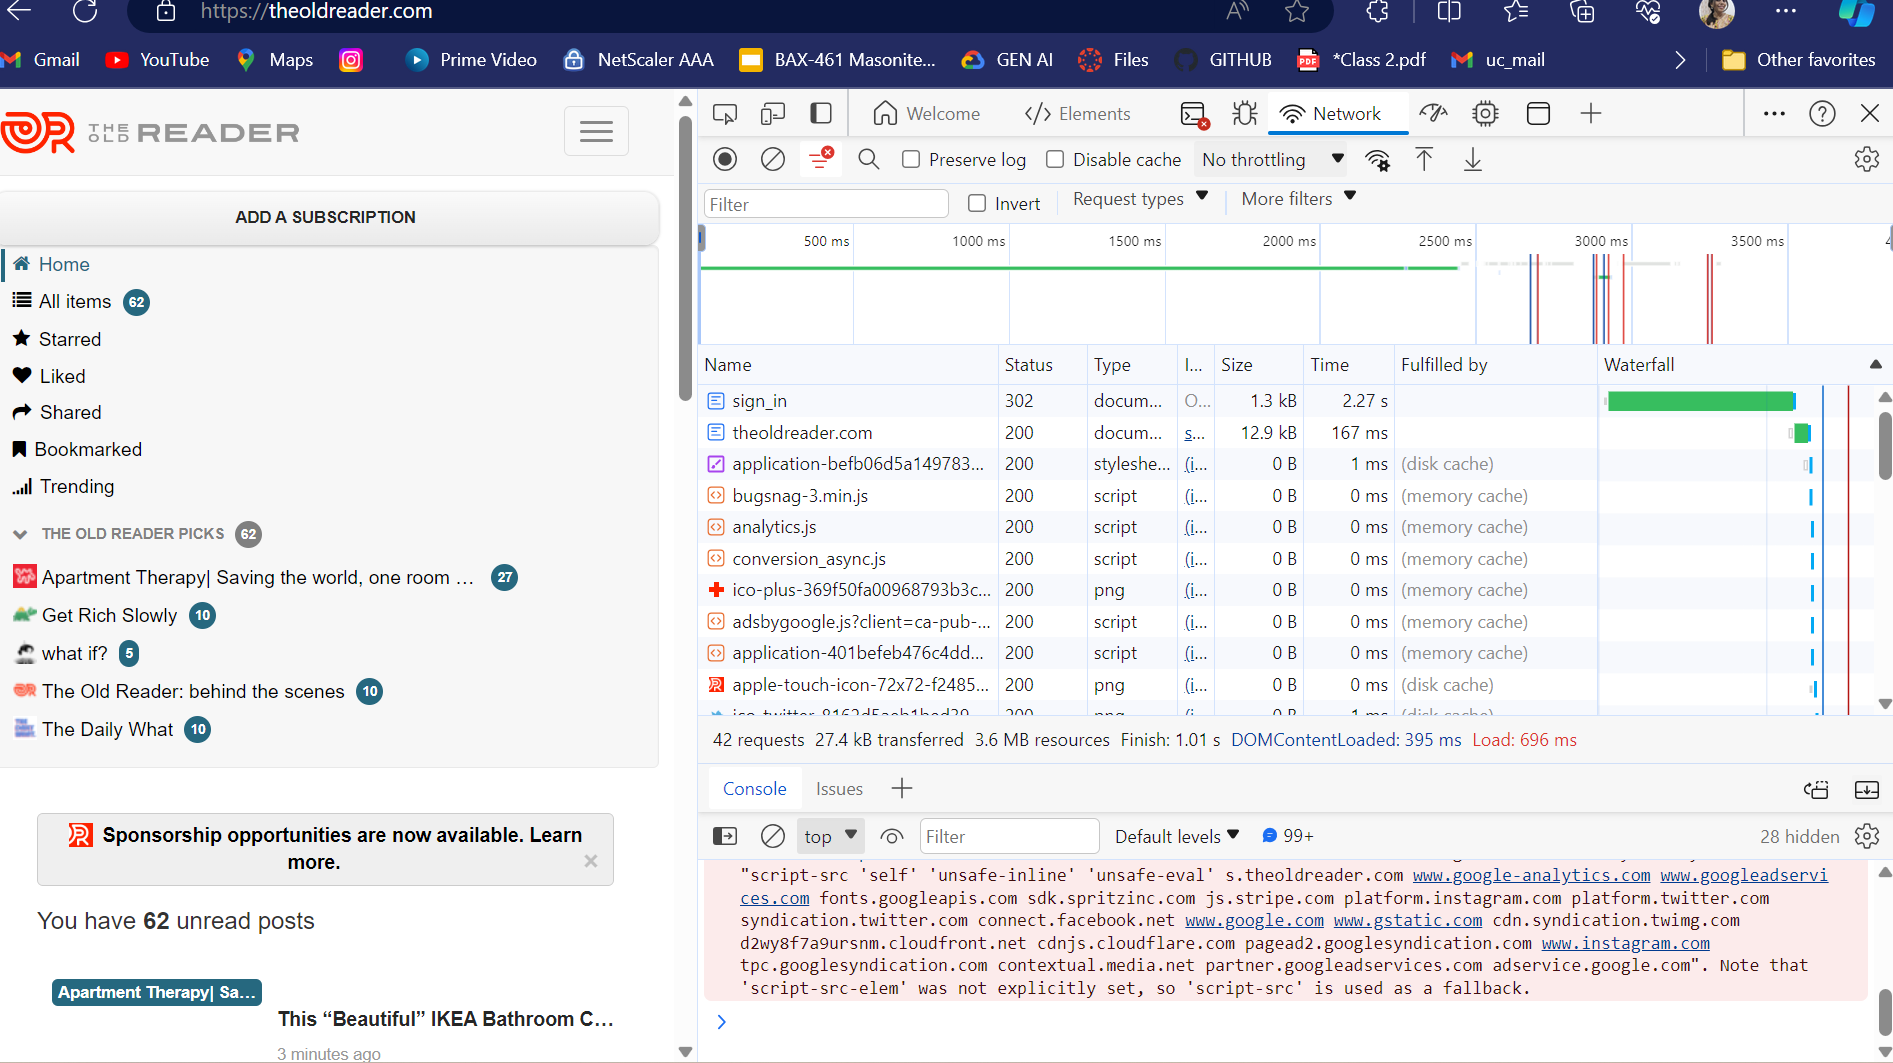




Carefully examine the payload that was submitted to the server during login.  Compare this payload to the `<form>` / `<input>` fields you previously analyzed.  Explain your observation.



###### EXPLANATION:


1. For account setup with a hosting service, logging in usually involves making a POST request. 

2. This is preferred to securely send information directly to the server's body, ensuring that confidential data, including usernames and passwords, remain hidden and are not visible in the URL.
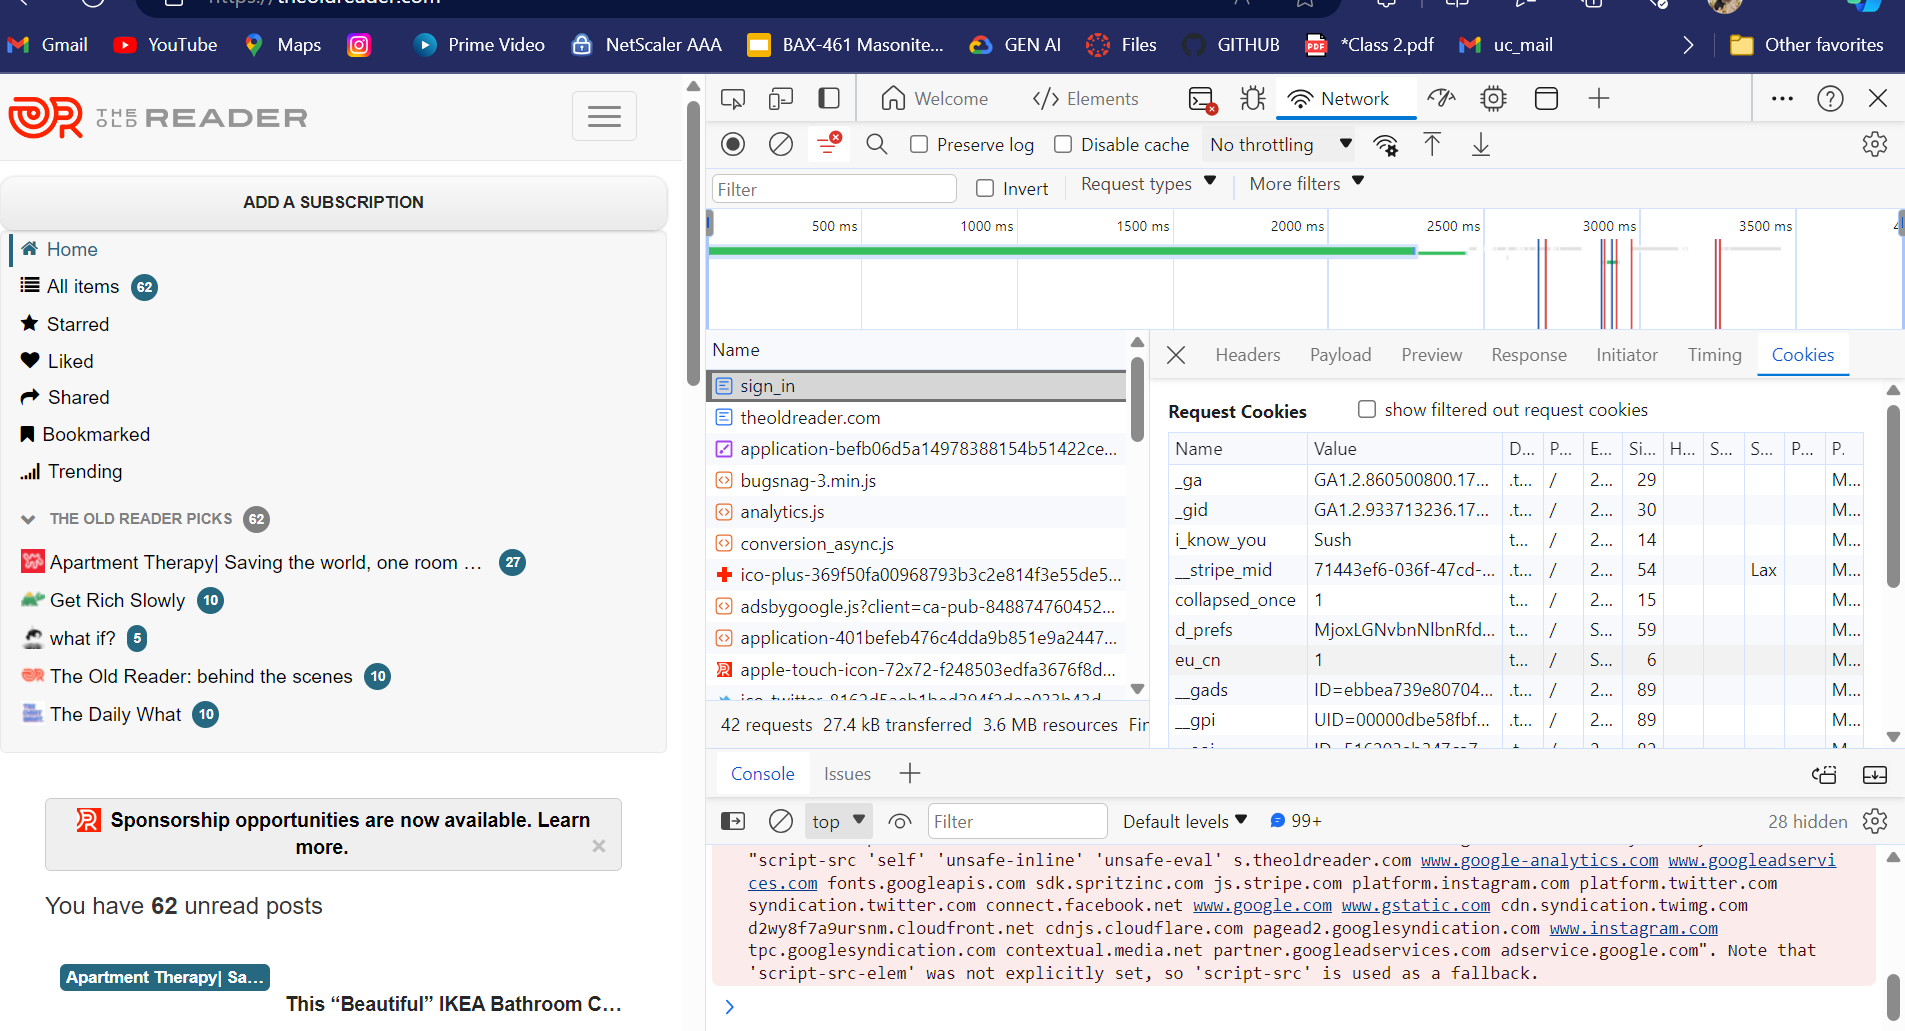






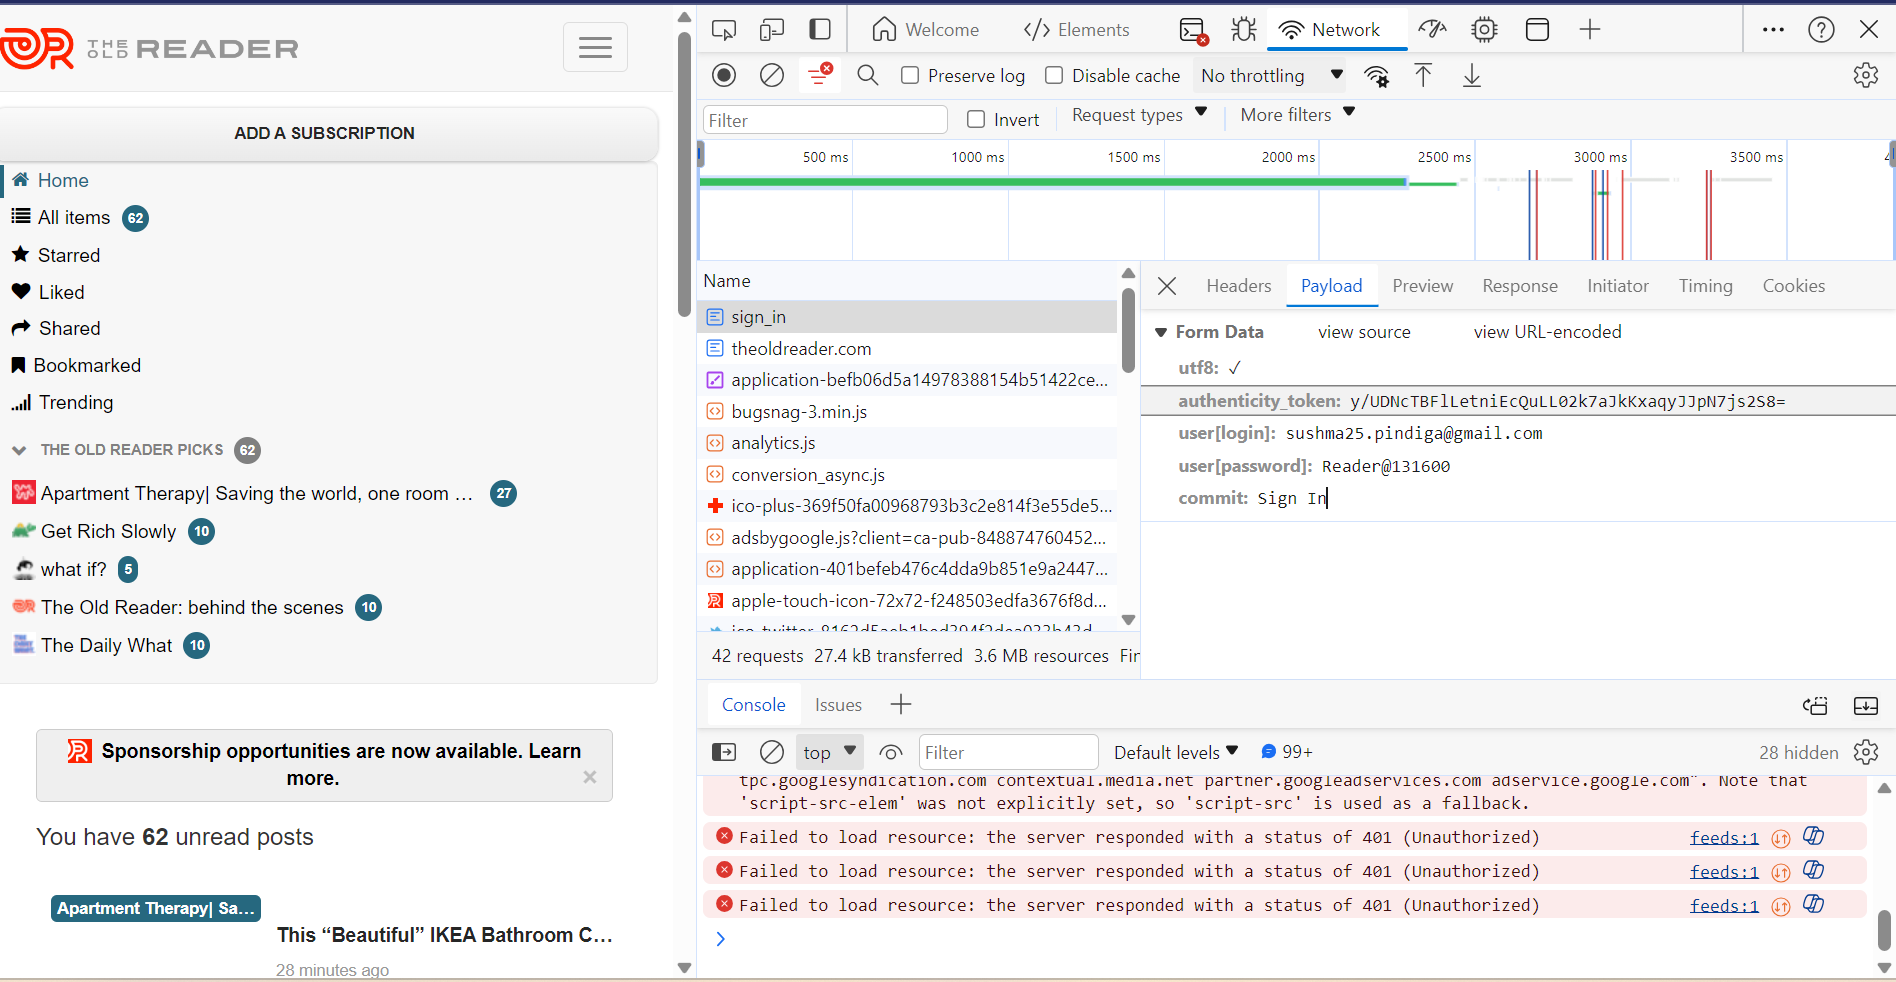

3. The payload page have the stored information that already present existing user with credentials on it's server

##### 4. Automating the Login Process:


In [ ]:
from bs4 import BeautifulSoup
import requests
import time

headers = {'User-agent': 'Mozilla/5.0'}

url3 = 'https://theoldreader.com/users/sign_in'
page_PART3 = requests.get(url3, headers=headers)
soup = BeautifulSoup(page_PART3.content, 'html.parser')
print(soup.prettify())

time.sleep(5)

In [ ]:
# Extract the  authenticity_token from the login page
input = soup.select_one ('input[name = "authenticity_token"]')
authenticity_token = input.get('value')
print(authenticity_token)

###### Create a session object to maintain your login state across multiple requests.
Prepare a payload with your login credentials and other necessary form data identified from the login page and the network analysis.

Send a POST request to the login form’s action URL to log in, using the session object.

In [ ]:
# Always pause between two requests.
time.sleep(10) # 10s

# An open session carries the cookies and allows you to make post requests
session = requests.session()

res = session.post('https://theoldreader.com/users/sign_in', 
                        data = {
                               
                                'return_format' : 'json',
                                'authenticity_token' : authenticity_token,
                                'user[login]' : 'sushma25.pindiga@gmail.com',
                                'user[password]' : 'Reader@131600',
                                'commit' : 'Sign In'},
                        
                        )

# This will get us the Cookies.
cookies = session.cookies.get_dict()
print(cookies)

###### 5.Verifying Successful Login:
After attempting to log in, inspect the cookies saved in the session object to understand the information The Old Reader stores on your computer.

Use the session object to access https://theoldreader.com

In [ ]:
# Always pause between two requests.
time.sleep(5) # 5s

# This is the easiest way to remain in-session.
page = session.get('https://theoldreader.com') 
soup = BeautifulSoup(page.content, 'html.parser')

print(soup)

###### Verify successful login by checking for the presence of your user information that is only available when logged in.

In [ ]:
#[Stackoverflow]
time.sleep(5)
user = soup.select_one('a.dropdown-toggle[data-toggle="dropdown"]')
if user:
    user = user.text.strip().split()[0]
    print(f"UserName_login as : {user}")